<a href="https://colab.research.google.com/github/Stigggggg/UWr/blob/main/Zad1L1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Needed imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Preprocessing data and preparations for the algorithm
mnist = fetch_openml('mnist_784')
x, y = mnist.data / 255, mnist.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.9, random_state=42)
#x_train = x_train.to_numpy()
#y_train = y_train.to_numpy()
#x_test = x_test.to_numpy()
#y_test = y_test.to_numpy()
iterations = [1, 2, 11] # long calculations for 22, 44 and 88
results = {}

In [ ]:
# Algorithm itself
for k in range(1, 11):
  results[k] = []
  for i in iterations:
    accuracies = []
    for j in range(i):
      x_train_resampled, y_train_resampled = resample(x_train, y_train, replace=True)
      knn = KNeighborsClassifier(n_neighbors=k)
      knn.fit(x_train_resampled, y_train_resampled)
      mask = ~x_train.index.isin(x_train_resampled.index)
      x_oob = x_train[mask]
      y_oob = y_train[mask]
      acc = knn.score(x_oob, y_oob)
      accuracies.append(acc)
    mean_accuracy = np.mean(accuracies)
    results[k].append((i, mean_accuracy))
results

{1: [(1, 0.9242129809560824),
  (2, 0.9380546876932081),
  (11, 0.9324099130327301)],
 2: [(1, 0.9242599000384467),
  (2, 0.9216394199038624),
  (11, 0.9215368681713406)],
 3: [(1, 0.9226327944572749),
  (2, 0.9246243990384615),
  (11, 0.9259339625064722)],
 4: [(1, 0.9273289524545806),
  (2, 0.9204313686101198),
  (11, 0.9212368943021718)],
 5: [(1, 0.9212475633528265),
  (2, 0.9244612271786184),
  (11, 0.9256431523309491)],
 6: [(1, 0.9124658069558421),
  (2, 0.9220885056027937),
  (11, 0.9246056790385402)],
 7: [(1, 0.926903941829315),
  (2, 0.9293373475078215),
  (11, 0.9261294263888309)],
 8: [(1, 0.9240262244504435),
  (2, 0.9228194567580954),
  (11, 0.9262176263839605)],
 9: [(1, 0.922062815044591),
  (2, 0.9311513211857088),
  (11, 0.9254886252278347)],
 10: [(1, 0.9213353798925557),
  (2, 0.9319161960561335),
  (11, 0.9254656919516471)]}

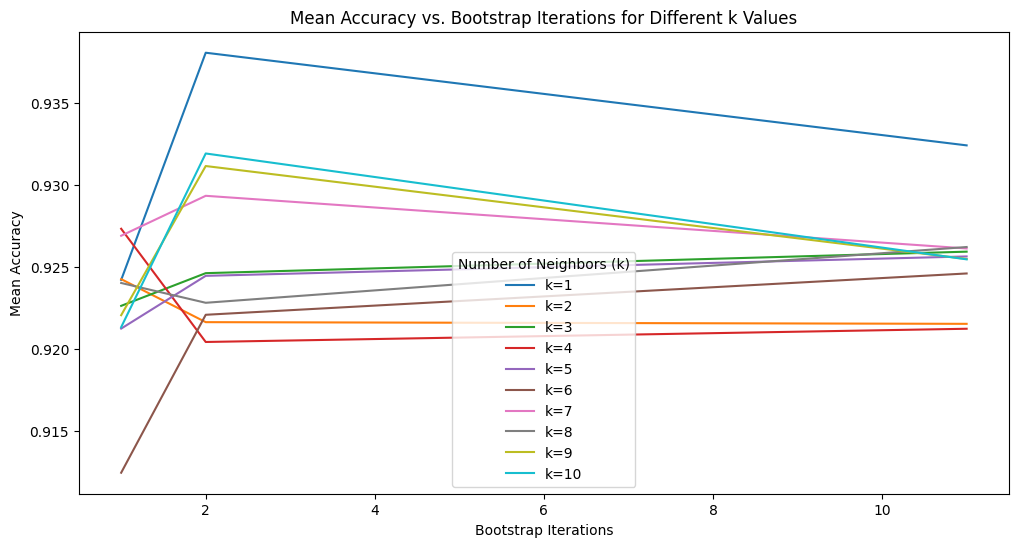

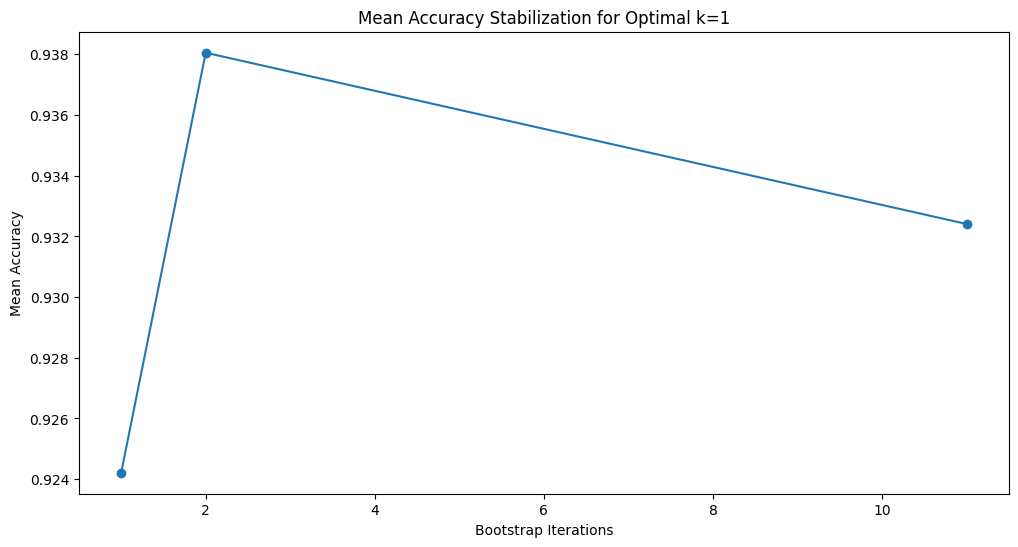

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))
for k, acc in results.items():
    plt.plot([iteration for iteration, _ in acc], [accuracy for _, accuracy in acc], label=f'k={k}')
plt.xlabel("Bootstrap Iterations")
plt.ylabel("Mean Accuracy")
plt.title("Mean Accuracy vs. Bootstrap Iterations for Different k Values")
plt.legend(title="Number of Neighbors (k)")
plt.show()

optimal_k = max(results, key=lambda k: max(results[k], key=lambda x: x[1])[1])
optimal_k_accuracies = results[optimal_k]

plt.figure(figsize=(12, 6))
plt.plot([iteration for iteration, _ in optimal_k_accuracies], [accuracy for _, accuracy in optimal_k_accuracies], marker='o')
plt.xlabel("Bootstrap Iterations")
plt.ylabel("Mean Accuracy")
plt.title(f"Mean Accuracy Stabilization for Optimal k={optimal_k}")
plt.show()